In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
np.random.seed(42)
n_samples = 30 

cov = np.array([[1.5, 0.8], [0.8, 1.25]])
means = [[-0.5, -0.5], [1, 3], [3, 1]]

# multivariate X distributions
X = [
    np.random.multivariate_normal(mean=mean, cov=cov, size=n_samples)
    for mean in means
]
X = np.vstack(tuple(X))

# y for multivariate X distributions 1, 2 or 3
y = [
    np.full(n_samples, distribution, dtype=int) 
    for distribution in range(1, 4)
]
y = np.hstack(y)

In [3]:
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'y': y})

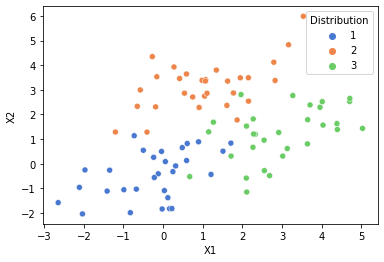

In [4]:
x1_x2_scatterplot = sns.scatterplot(
    data=data, 
    x='X1', 
    y='X2', 
    hue='y',
    palette='muted'
)
x1_x2_scatterplot.legend(title='Distribution')
plt.show()

In [5]:
classifier = LinearDiscriminantAnalysis()
classifier.fit(X, y)

LinearDiscriminantAnalysis()

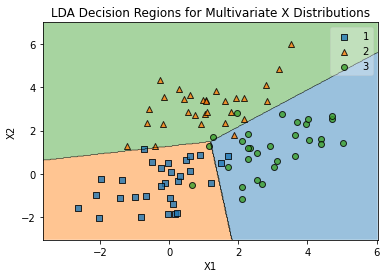

In [6]:
# help(plot_decision_regions) # mlextend
plot_decision_regions(X, y, clf=classifier, hide_spines=False)
plt.title('LDA Decision Regions for Multivariate X Distributions')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()